From allcools page:https://lhqing.github.io/ALLCools/cell_level/step_by_step/100kb/02-BasicFeatureFiltering.html
Feature Basic Filtering
Purpose¶
Apply basic filters to remove these problematic features:

Extremly low coverage or high coverage features

ENCODE Blcaklist

Some chromosomes (usually, chrY and chrM)



Input
Cell metadata (after basic cell filter)

MCDS files

Output
FeatureList.BasicFilter.txt: List of feature ids passed all filters

In [1]:
cd /share/lasallelab/Ensi/project/allcools/oocytes/

/share/lasallelab/Ensi/project/allcools/oocytes


In [2]:
conda activate /share/lasallelab/Ensi/anaconda3/allcools/

usage: conda [-h] [--no-plugins] [-V] COMMAND ...
conda: error: argument COMMAND: invalid choice: 'activate' (choose from 'clean', 'compare', 'config', 'create', 'info', 'init', 'install', 'list', 'notices', 'package', 'remove', 'uninstall', 'rename', 'run', 'search', 'update', 'upgrade', 'build', 'content-trust', 'convert', 'debug', 'develop', 'doctor', 'index', 'inspect', 'metapackage', 'render', 'repoquery', 'skeleton', 'env', 'server', 'repo', 'pack', 'verify', 'token')

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pathlib
import pandas as pd
import seaborn as sns
from ALLCools.mcds import MCDS
import matplotlib.pyplot as plt


In [4]:
sns.set_context(context='notebook', font_scale=1.3)

In [7]:
#parameters 
metadata_path = 'CellMetadata.PassQC_oocyte.csv'

# change this to the paths to your MCDS files
mcds_path = '/share/lasallelab/Ensi/project/allcools/oocytes/mcds/'
# Dimension name used to do clustering
obs_dim = 'cell'
var_dim = 'chrom100k'

min_cov = 4000
max_cov = 12000

#chrom_to_remove
exclude_chromosome= ['chrM', 'chrY', 'chrUn', 'Chromosome', 'NW']



In [8]:
# load metadata

metadata = pd.read_csv(metadata_path, index_col=0)
table = pd.read_csv("allc_table.csv", index_col=0, header=None)

total_cells = metadata.shape[0]
print(f'Metadata of {total_cells} cells')



Metadata of 120 cells


In [9]:
mcds = MCDS.open(mcds_path, 
                 var_dim='chrom100k', 
                 use_obs=metadata.index)
total_feature = mcds.get_index(var_dim).size
total_feature

31764

Feature chrom100k mean cov across cells added in MCDS.coords['chrom100k_cov_mean'].


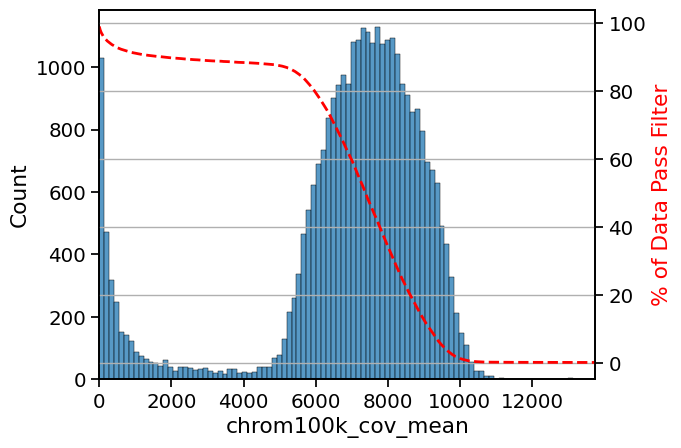

In [10]:
# Assuming mcds is your object and add_feature_cov_mean() generates a plot
mcds.add_feature_cov_mean()

# Save the plot to a file
#plt.savefig('05b_mcds100kb_featurecoverage.png', dpi=300, bbox_inches='tight')


In [11]:
mcds

<xarray.MCDS> Size: 99MB
Dimensions:             (cell: 120, chrom100k: 31764, count_type: 2,
                         mc_type: 3, chrom100k_cov_mean: 31764)
Coordinates:
  * cell                (cell) <U20 10kB '4636344664PO1NC5L9C' ... '421114495...
  * chrom100k           (chrom100k) <U29 4MB 'chr1_0' 'chr1_1' ... 'chrY_117'
    chrom100k_chrom     (chrom100k) <U27 3MB ...
    chrom100k_end       (chrom100k) int64 254kB ...
    chrom100k_start     (chrom100k) int64 254kB ...
  * count_type          (count_type) <U3 24B 'mc' 'cov'
  * mc_type             (mc_type) <U3 36B 'CGN' 'CAN' 'CHN'
  * chrom100k_cov_mean  (chrom100k_cov_mean) float64 254kB 7.653e+03 ... 0.0
Data variables:
    chrom100k_da        (cell, chrom100k, mc_type, count_type) uint32 91MB dask.array<chunksize=(31, 7941, 1, 1), meta=np.ndarray>
Attributes:
    obs_dim:  cell
    var_dim:  chrom100k

In [12]:
chrom100k_dim_labels = mcds['chrom100k_cov_mean'].values
print(chrom100k_dim_labels.max())


584117.3416666667


In [15]:

mcds = mcds.filter_feature_by_cov_mean(
    min_cov=min_cov,  # minimum coverage
    max_cov=max_cov  # Maximum coverage
)

KeyError: "not all values found in index 'chrom100k'"

In [7]:
mcds = mcds.remove_chromosome(exclude_chromosome)

119 chrom100k features in ['chrM', 'chrY', 'chrUn', 'Chromosome', 'NW'] removed.


In [14]:
print(
    f'{mcds.get_index(var_dim).size} ({mcds.get_index(var_dim).size * 100 / total_feature:.1f}%) '
    f'{var_dim} remained after all the basic filter.')

31645 (99.6%) chrom100k remained after all the basic filter.
